In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pd.set_option('display.max_rows', 500)
data=pd.read_csv('YourCabs.csv')

In [3]:
data.head(10)

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,2,NaN,1021.0,1323.0,NaN,NaN,01-01-2013 22:30,0,0,01-01-2013 08:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,2,NaN,1192.0,832.0,NaN,NaN,01-01-2013 11:00,0,0,01-01-2013 09:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,2,NaN,516.0,376.0,NaN,NaN,01-01-2013 11:00,0,0,01-01-2013 09:49,13.005600,77.657990,12.902450,77.660810,0


In [142]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [143]:
data['from_area_id'].nunique()

598

In [144]:
data = data.drop(['id','user_id'],axis=1)
data.head()

,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [145]:
data['vehicle_model_id'].value_counts()

vehicle_model_id
12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

In [146]:
pd.get_dummies(data.vehicle_model_id.astype('object'))[12].astype('int')

0        0
1        1
2        1
3        1
4        1
        ..
43426    1
43427    1
43428    1
43429    0
43430    1
Name: 12, Length: 43431, dtype: int32

In [147]:

data['VM_id12'] =pd.get_dummies(data.vehicle_model_id.astype('object'))[12].astype('int')
data['VM_id12'].value_counts()

VM_id12
1    31859
0    11572
Name: count, dtype: int64

In [148]:
del data['vehicle_model_id']
data.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [149]:
data['travel_type_id'].astype('object')
data['travel_type_id'].astype('int')

0        2
1        2
2        2
3        2
4        2
        ..
43426    2
43427    2
43428    3
43429    2
43430    2
Name: travel_type_id, Length: 43431, dtype: int32

In [150]:
data['travel_type_id'].nunique()

3

In [151]:
data_tid_1=data.loc[data['travel_type_id']==1]
data_tid_1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
6,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,1
17,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,0
24,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,0
158,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,0
216,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,0


In [152]:
data_tid_2 = data.loc[data['travel_type_id']==2]
data_tid_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [153]:
data_tid_3 = data.loc[data['travel_type_id']==3]
data_tid_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


### Pre Processing for travel_id is 1

In [154]:
data_tid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
 15  VM_id12              1589 non-null   int32

In [155]:
data_tid_1=data_tid_1.drop(['travel_type_id','package_id','to_area_id','to_lat','to_long','from_long','from_lat'],axis=1)
data_tid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0


In [156]:
data_tid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0


In [157]:
data_tid_1.head(100)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0
233,293.0,15.0,32.0,01-05-2013 08:00,0,0,01-04-2013 12:43,0,0
234,912.0,1.0,32.0,01-05-2013 06:00,1,0,01-04-2013 12:51,0,0
243,410.0,15.0,29.0,01-09-2013 06:00,0,0,01-04-2013 14:40,0,0
328,393.0,15.0,32.0,01-05-2013 22:45,0,0,01-05-2013 15:29,0,1
332,396.0,15.0,32.0,01-06-2013 06:45,0,0,01-05-2013 16:24,0,1


In [158]:
data_tid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
 8   VM_id12              1589 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 117.9+ KB


In [159]:
# checking all the null values
data_tid_1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
VM_id12                  0
dtype: int64

In [160]:
data_tid_1['from_area_id']=data_tid_1['from_area_id'].astype('object')
data_tid_1['from_city_id']=data_tid_1['from_city_id'].astype('object')
data_tid_1['to_city_id']=data_tid_1['to_city_id'].astype('object')

data_tid_1['from_date'] =pd.to_datetime(data_tid_1.from_date ,format='mixed')
data_tid_1['booking_created']=pd.to_datetime(data_tid_1.booking_created,format='mixed')

data_tid_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
 8   VM_id12              1589 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(3)
memory usage: 117.9+ KB


In [161]:
# handling null values 
data_tid_1.describe(include='object')

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [162]:
data_tid_1['from_area_id']= data_tid_1['from_area_id'].fillna(393)
data_tid_1['from_city_id']= data_tid_1['from_city_id'].fillna(15)
data_tid_1['to_city_id']= data_tid_1['to_city_id'].fillna(32)
data_tid_1.isnull().sum()

C:\Users\malik\AppData\Local\Temp\ipykernel_23528\482472934.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_tid_1['from_area_id']= data_tid_1['from_area_id'].fillna(393)
C:\Users\malik\AppData\Local\Temp\ipykernel_23528\482472934.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_tid_1['from_city_id']= data_tid_1['from_city_id'].fillna(15)
C:\Users\malik\AppData\Local\Temp\ipykernel_23528\482472934.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
VM_id12                0
dtype: int64

In [163]:
areaid_percent=data_tid_1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
data_tid_1['areaid_percent']=data_tid_1.from_area_id.map(areaid_percent)
data_tid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_percent
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000


In [164]:
data_tid_1.areaid_percent.describe()

count    1589.000000
mean        0.013216
std         0.044239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008696
max         0.500000
Name: areaid_percent, dtype: float64

In [165]:
data_tid_1['areaid_cancelation_volume']=np.where(data_tid_1['areaid_percent'] >= 0.009 , 'high',
                                                np.where(data_tid_1['areaid_percent'] == 0.0 , 'zero',
                                                        np.where(data_tid_1['areaid_percent'] <= 0.008 , 'medium','low')))
data_tid_1.head(100)


,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_percent,areaid_cancelation_volume
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408,high
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000,zero
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000,zero
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000,zero
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000,zero
233,293.0,15.0,32.0,2013-01-05 08:00:00,0,0,2013-01-04 12:43:00,0,0,0.000000,zero
234,912.0,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0,0.000000,zero
243,410.0,15.0,29.0,2013-01-09 06:00:00,0,0,2013-01-04 14:40:00,0,0,0.000000,zero
328,393.0,15.0,32.0,2013-01-05 22:45:00,0,0,2013-01-05 15:29:00,0,1,0.008696,low
332,396.0,15.0,32.0,2013-01-06 06:45:00,0,0,2013-01-05 16:24:00,0,1,0.076923,high


In [166]:
data_tid_1.areaid_cancelation_volume.value_counts()

areaid_cancelation_volume
zero    979
low     345
high    265
Name: count, dtype: int64

In [167]:
data_tid_1=data_tid_1.drop(['areaid_percent','from_area_id'],axis=1)
data_tid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high
17,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero
216,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero


In [168]:
#creating city by combining the two variables
data_tid_1['City_route']=data_tid_1.from_city_id.astype('str') + '->' + data_tid_1['to_city_id'].astype('str')
data_tid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume,City_route
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high,15.0->108.0
17,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero,15.0->32.0
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero,15.0->32.0
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero,1.0->152.0
216,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero,15.0->32.0


In [169]:
city_route_canc = data_tid_1[['City_route','Car_Cancellation']].groupby('City_route').mean()['Car_Cancellation']
data_tid_1['city_route_per']=data_tid_1.City_route.map(city_route_canc)
data_tid_1['city_route_per'].describe()

count    1589.000000
mean        0.013216
std         0.019121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.017937
max         0.086957
Name: city_route_per, dtype: float64

In [170]:
data_tid_1['city_route_volume']=np.where(data_tid_1['city_route_per'] >= 0.02 , 'high' , 
                                          np.where(data_tid_1['city_route_per'] == 0.0 , 'zero' ,
                                                   np.where(data_tid_1['city_route_per'] <=0.01 , 'low' ,'medium' )))
data_tid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume,City_route,city_route_per,city_route_volume
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high,15.0->108.0,0.016129,medium
17,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero,15.0->32.0,0.017937,medium
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero,15.0->32.0,0.017937,medium
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero,1.0->152.0,0.000000,zero
216,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero,15.0->32.0,0.017937,medium


In [171]:
data_tid_1 = data_tid_1.drop(['city_route_per','City_route','from_city_id','to_city_id'],axis=1)
data_tid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high,medium
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero,medium
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero,medium
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero,zero
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero,medium


In [172]:
data_tid_1['month']=data_tid_1.from_date.dt.month
data_tid_1['day_of_week']=data_tid_1.from_date.dt.dayofweek
data_tid_1['is_weekend']=(data_tid_1['day_of_week'] >= 5 ).astype('int')
data_tid_1['hour']=data_tid_1.from_date.dt.hour
data_tid_1['time_of_day']=pd.cut(data_tid_1['hour'],bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
data_tid_1['time_diff'] = (data_tid_1.from_date - data_tid_1.booking_created).dt.total_seconds()/3600
data_tid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,is_weekend,hour,time_of_day,time_diff
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high,medium,1,1,0,9,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero,medium,1,5,1,8,Morning,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero,medium,1,5,1,8,Morning,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero,zero,1,4,0,9,Morning,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero,medium,1,6,1,7,Morning,45.966667


In [173]:
data_tid_1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [174]:
data_tid_1['booking_time']=pd.cut(data_tid_1['time_diff'] , bins=[-8,2,17,45,1500] , labels=['Urgent','SameDay','Regular','Advance'])
data_tid_1.head()
                                  

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,is_weekend,hour,time_of_day,time_diff,booking_time
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,high,medium,1,1,0,9,Morning,0.400000,Urgent
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,zero,medium,1,5,1,8,Morning,259.716667,Advance
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,zero,medium,1,5,1,8,Morning,89.833333,Advance
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,zero,zero,1,4,0,9,Morning,21.183333,Regular
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,zero,medium,1,6,1,7,Morning,45.966667,Advance


In [175]:
data_tid_1 = data_tid_1.drop(['from_date','booking_created','time_diff','hour'],axis=1)
data_tid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,is_weekend,time_of_day,booking_time
6,0,0,0,1,high,medium,1,1,0,Morning,Urgent
17,1,0,0,0,zero,medium,1,5,1,Morning,Advance
24,0,0,0,0,zero,medium,1,5,1,Morning,Advance
158,1,0,0,0,zero,zero,1,4,0,Morning,Regular
216,1,0,0,0,zero,medium,1,6,1,Morning,Advance


In [176]:
# import the libraries for EDA 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

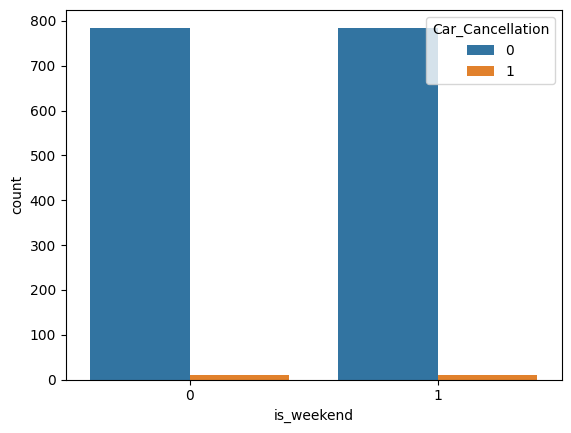

In [177]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=data_tid_1)
plt.show()

In [178]:
# so in this graph we cannot understand anything so we drop the is_weekend column 
data_tid_1 = data_tid_1.drop(['is_weekend'],axis=1)
data_tid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,time_of_day,booking_time
6,0,0,0,1,high,medium,1,1,Morning,Urgent
17,1,0,0,0,zero,medium,1,5,Morning,Advance
24,0,0,0,0,zero,medium,1,5,Morning,Advance
158,1,0,0,0,zero,zero,1,4,Morning,Regular
216,1,0,0,0,zero,medium,1,6,Morning,Advance


In [179]:
#transform the categorical column into numerical by label encoder
data_tid_1['time_of_day']=le.fit_transform(data_tid_1['time_of_day'])
data_tid_1['city_route_volume']=le.fit_transform(data_tid_1['city_route_volume'])
data_tid_1['booking_time']=le.fit_transform(data_tid_1['booking_time'])
data_tid_1['areaid_cancelation_volume']=le.fit_transform(data_tid_1['areaid_cancelation_volume'])
data_tid_1['city_route_volume']=le.fit_transform(data_tid_1['city_route_volume'])
data_tid_1


,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,time_of_day,booking_time
6,0,0,0,1,0,1,1,1,2,3
17,1,0,0,0,2,1,1,5,2,0
24,0,0,0,0,2,1,1,5,2,0
158,1,0,0,0,2,2,1,4,2,1
216,1,0,0,0,2,1,1,6,2,0
...,...,...,...,...,...,...,...,...,...,...
43342,1,0,0,1,1,0,11,5,1,2
43385,1,0,0,0,2,1,11,4,0,0
43386,1,0,0,1,2,1,11,6,2,2
43393,0,0,0,1,1,2,11,6,2,2


In [180]:
X=data_tid_1.drop(['Car_Cancellation'],axis=1)
y=data_tid_1['Car_Cancellation']

In [181]:
X.head()

,online_booking,mobile_site_booking,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,time_of_day,booking_time
6,0,0,1,0,1,1,1,2,3
17,1,0,0,2,1,1,5,2,0
24,0,0,0,2,1,1,5,2,0
158,1,0,0,2,2,1,4,2,1
216,1,0,0,2,1,1,6,2,0


In [182]:
y.head()

6      0
17     0
24     0
158    0
216    0
Name: Car_Cancellation, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [184]:
X_train.head()

,online_booking,mobile_site_booking,VM_id12,areaid_cancelation_volume,city_route_volume,month,day_of_week,time_of_day,booking_time
35463,1,0,0,1,1,9,0,3,1
42185,0,0,0,1,2,11,3,2,1
10151,1,0,0,1,2,5,3,0,0
37778,1,0,1,0,1,10,0,2,2
42513,0,1,1,1,2,11,6,3,1


In [185]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [186]:
ytrainpred = dt_model.predict(X_train)
ytestpred = dt_model.predict(X_test)

In [187]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      0.88      0.94        17

    accuracy                           1.00      1112
   macro avg       1.00      0.94      0.97      1112
weighted avg       1.00      1.00      1.00      1112



In [188]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       473
           1       0.20      0.25      0.22         4

    accuracy                           0.99       477
   macro avg       0.60      0.62      0.61       477
weighted avg       0.99      0.99      0.99       477



In [189]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [190]:
ytrainpred = rf_model.predict(X_train)
ytestpred = rf_model.predict(X_test)

In [191]:
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       0.94      0.94      0.94        17

    accuracy                           1.00      1112
   macro avg       0.97      0.97      0.97      1112
weighted avg       1.00      1.00      1.00      1112



In [192]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       473
           1       0.50      0.25      0.33         4

    accuracy                           0.99       477
   macro avg       0.75      0.62      0.66       477
weighted avg       0.99      0.99      0.99       477



In [193]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [194]:
ytrainpred = nb_model.predict(X_train)
ytestpred = nb_model.predict(X_test)

In [195]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))


              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1095
           1       0.08      1.00      0.14        17

    accuracy                           0.82      1112
   macro avg       0.54      0.91      0.52      1112
weighted avg       0.99      0.82      0.89      1112



In [196]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       473
           1       0.03      0.75      0.06         4

    accuracy                           0.80       477
   macro avg       0.51      0.78      0.47       477
weighted avg       0.99      0.80      0.88       477



In [197]:
# here we can choose decision tree for deployment for data_tid_1

In [198]:
data_tid_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [199]:
data_tid_2.isnull().sum()

travel_type_id             0
package_id             34292
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
VM_id12                    0
dtype: int64

In [200]:
data_tid_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       34292 non-null  int64  
 1   package_id           0 non-null      float64
 2   from_area_id         34292 non-null  float64
 3   to_area_id           34292 non-null  float64
 4   from_city_id         14504 non-null  float64
 5   to_city_id           0 non-null      float64
 6   from_date            34292 non-null  object 
 7   online_booking       34292 non-null  int64  
 8   mobile_site_booking  34292 non-null  int64  
 9   booking_created      34292 non-null  object 
 10  from_lat             34292 non-null  float64
 11  from_long            34292 non-null  float64
 12  to_lat               34292 non-null  float64
 13  to_long              34292 non-null  float64
 14  Car_Cancellation     34292 non-null  int64  
 15  VM_id12              34292 non-null  int3

In [201]:
data_tid_2 = data_tid_2.drop(['package_id','to_city_id','travel_type_id'],axis=1)
data_tid_2.head()

,from_area_id,to_area_id,from_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
0,83.0,448.0,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010.0,540.0,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301.0,1034.0,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768.0,398.0,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365.0,849.0,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [202]:
data_tid_2.isnull().sum()

from_area_id               0
to_area_id                 0
from_city_id           19788
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
VM_id12                    0
dtype: int64

In [203]:
data_tid_2.from_city_id.describe()

count    14504.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: from_city_id, dtype: float64

In [204]:
data_tid_2.isnull().mean()*100
#so we have a 57 % null values in from_city_id variable which doesn't make any sense so we have to drop it

from_area_id            0.000000
to_area_id              0.000000
from_city_id           57.704421
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.000000
from_long               0.000000
to_lat                  0.000000
to_long                 0.000000
Car_Cancellation        0.000000
VM_id12                 0.000000
dtype: float64

In [205]:
data_tid_2= data_tid_2.drop(['from_city_id'],axis=1)
data_tid_2

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,1
43426,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,1
43427,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,1
43429,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,0


In [206]:
data_tid_2['from_area_id'].nunique()

586

In [207]:
data_tid_2['to_area_id'].nunique()

567

In [208]:
data_tid_2['city_route']= data_tid_2['from_area_id'].astype('str')+ '->' + data_tid_2['to_area_id'].astype('str')
data_tid_2['city_route'].head()

0       83.0->448.0
1     1010.0->540.0
2    1301.0->1034.0
3      768.0->398.0
4     1365.0->849.0
Name: city_route, dtype: object

In [209]:
city_route_canc = data_tid_2[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
data_tid_2['city_route_per']=data_tid_2.city_route.map(city_route_canc)
data_tid_2['city_route_per'].nunique()

132

In [210]:
data_tid_2['city_route_per'].describe()

count    34292.000000
mean         0.080923
std          0.202363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.051282
max          1.000000
Name: city_route_per, dtype: float64

In [211]:
data_tid_2['city_cancel_volume']=np.where(data_tid_2['city_route_per'] >= 0.052 ,'high' ,
                                          np.where(data_tid_2['city_route_per'] == 0.00 , 'zero' ,
                                                   np.where(data_tid_2['city_route_per'] <=0.051 ,'low' , 'medium')))
data_tid_2['city_cancel_volume'].head()

0    zero
1    zero
2    zero
3    zero
4    zero
Name: city_cancel_volume, dtype: object

In [212]:
data_tid_2['city_cancel_volume'].value_counts()

city_cancel_volume
zero      20786
high       8517
low        4911
medium       78
Name: count, dtype: int64

In [213]:
#now we have to drop these columns from_area_id , to_area_id ,city_route_per,city_route and aslo from_lat, from_long ,to_lat ,to_long because they
#point towards the area address which is also given into from_area_id and to_area_id 
data_tid_2 = data_tid_2.drop(['from_area_id' , 'to_area_id' ,'from_lat','city_route_per','city_route', 'from_long' ,'to_lat' ,'to_long'],axis=1)
data_tid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,city_cancel_volume
0,01-01-2013 02:00,0,0,01-01-2013 01:39,0,0,zero
1,01-01-2013 09:00,0,0,01-01-2013 02:25,0,1,zero
2,01-01-2013 03:30,0,0,01-01-2013 03:08,0,1,zero
3,01-01-2013 05:45,0,0,01-01-2013 04:39,0,1,zero
4,01-01-2013 09:00,0,0,01-01-2013 07:53,0,1,zero


In [214]:
data_tid_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   from_date            34292 non-null  object
 1   online_booking       34292 non-null  int64 
 2   mobile_site_booking  34292 non-null  int64 
 3   booking_created      34292 non-null  object
 4   Car_Cancellation     34292 non-null  int64 
 5   VM_id12              34292 non-null  int32 
 6   city_cancel_volume   34292 non-null  object
dtypes: int32(1), int64(3), object(3)
memory usage: 2.0+ MB


In [215]:
# from_date and booking_created are in object we have to convert it in datetime datatype and 
data_tid_2['from_date']=pd.to_datetime(data_tid_2['from_date'],format='mixed')
data_tid_2['booking_created']=pd.to_datetime(data_tid_2['booking_created'],format='mixed')
data_tid_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_date            34292 non-null  datetime64[ns]
 1   online_booking       34292 non-null  int64         
 2   mobile_site_booking  34292 non-null  int64         
 3   booking_created      34292 non-null  datetime64[ns]
 4   Car_Cancellation     34292 non-null  int64         
 5   VM_id12              34292 non-null  int32         
 6   city_cancel_volume   34292 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(3), object(1)
memory usage: 2.0+ MB


In [216]:
#now let's extract the dates into isweekend , day_of_month , month , day_of_week ,hour
data_tid_2['hour']=data_tid_2.from_date.dt.hour
data_tid_2['month']=data_tid_2.from_date.dt.month
data_tid_2['day_of_week']=data_tid_2.from_date.dt.day_of_week
data_tid_2['isweekend']=(data_tid_2.day_of_week >=5 ).astype('int')
data_tid_2['time_diff']=(data_tid_2.from_date - data_tid_2.booking_created).dt.total_seconds()/3600
data_tid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,time_diff
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,0,zero,2,1,1,0,0.350000
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,1,zero,9,1,1,0,6.583333
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,1,zero,3,1,1,0,0.366667
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,1,zero,5,1,1,0,1.100000
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,1,zero,9,1,1,0,1.116667


In [217]:
data_tid_2['time_diff'].describe()

count    34292.000000
mean        37.202130
std        100.917727
min        -22.900000
25%          3.183333
50%          8.833333
75%         19.166667
max       1906.900000
Name: time_diff, dtype: float64

In [218]:
data_tid_2['booking_nature'] = pd.cut(data_tid_2['time_diff'], bins=[-23,4,9,20,1910],labels=['Urgent','SameDay','Regular','Advance'])
data_tid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,time_diff,booking_nature
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,0,zero,2,1,1,0,0.350000,Urgent
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,1,zero,9,1,1,0,6.583333,SameDay
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,1,zero,3,1,1,0,0.366667,Urgent
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,1,zero,5,1,1,0,1.100000,Urgent
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,1,zero,9,1,1,0,1.116667,Urgent


In [219]:
# now we have to drop the from_date , booking_created,time_diff 
data_tid_2 =data_tid_2.drop(['from_date','booking_created','time_diff'],axis=1)
data_tid_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,booking_nature
0,0,0,0,0,zero,2,1,1,0,Urgent
1,0,0,0,1,zero,9,1,1,0,SameDay
2,0,0,0,1,zero,3,1,1,0,Urgent
3,0,0,0,1,zero,5,1,1,0,Urgent
4,0,0,0,1,zero,9,1,1,0,Urgent


In [220]:
#now we have to transfrom the categorical columns into numerical using encoder
data_tid_2['city_cancel_volume']=le.fit_transform(data_tid_2['city_cancel_volume'])
data_tid_2['booking_nature']=le.fit_transform(data_tid_2['booking_nature'])
data_tid_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,booking_nature
0,0,0,0,0,3,2,1,1,0,3
1,0,0,0,1,3,9,1,1,0,2
2,0,0,0,1,3,3,1,1,0,3
3,0,0,0,1,3,5,1,1,0,3
4,0,0,0,1,3,9,1,1,0,3


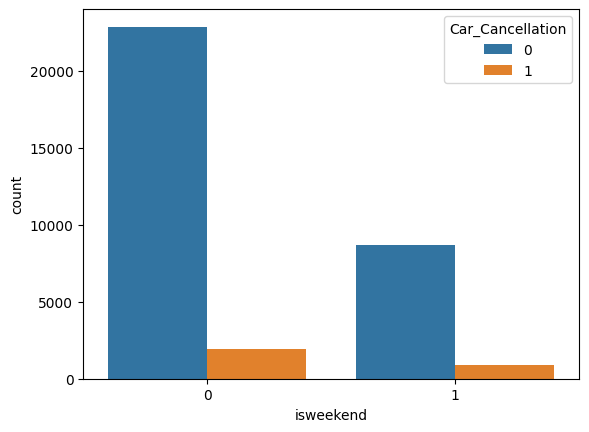

In [221]:
sns.countplot(x='isweekend',hue='Car_Cancellation',data=data_tid_2)
plt.show()

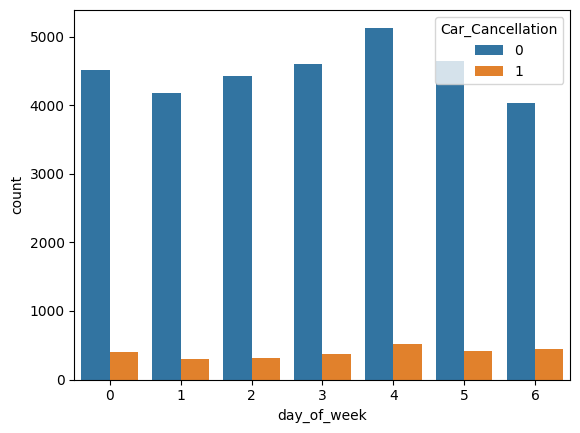

In [222]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=data_tid_2)
plt.show()

In [223]:
X=data_tid_2.drop(['Car_Cancellation'],axis=1)
y=data_tid_2['Car_Cancellation']

In [224]:
X.head()

,online_booking,mobile_site_booking,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,booking_nature
0,0,0,0,3,2,1,1,0,3
1,0,0,1,3,9,1,1,0,2
2,0,0,1,3,3,1,1,0,3
3,0,0,1,3,5,1,1,0,3
4,0,0,1,3,9,1,1,0,3


In [225]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
X_train.head()

,online_booking,mobile_site_booking,VM_id12,city_cancel_volume,hour,month,day_of_week,isweekend,booking_nature
9238,1,0,1,1,8,4,0,0,1
22214,0,0,1,3,5,7,4,0,1
9647,0,0,0,3,13,4,4,0,2
30578,0,0,1,0,8,9,1,0,0
26930,0,0,1,3,7,8,1,0,0


In [228]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
ytrainpred = dt_model.predict(X_train)
ytestpred = dt_model.predict(X_test)

In [230]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22059
           1       0.95      0.85      0.90      1945

    accuracy                           0.98     24004
   macro avg       0.97      0.92      0.94     24004
weighted avg       0.98      0.98      0.98     24004



In [231]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9458
           1       0.55      0.51      0.53       830

    accuracy                           0.93     10288
   macro avg       0.76      0.74      0.75     10288
weighted avg       0.92      0.93      0.93     10288



In [232]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [233]:
ytrainpred = rf_model.predict(X_train)
ytestpred = rf_model.predict(X_test)

In [234]:
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22059
           1       0.91      0.89      0.90      1945

    accuracy                           0.98     24004
   macro avg       0.95      0.94      0.95     24004
weighted avg       0.98      0.98      0.98     24004



In [235]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9458
           1       0.64      0.55      0.59       830

    accuracy                           0.94     10288
   macro avg       0.80      0.76      0.78     10288
weighted avg       0.94      0.94      0.94     10288



In [236]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [237]:
ytrainpred = nb_model.predict(X_train)
ytestpred = nb_model.predict(X_test)

In [238]:
print(metrics.classification_report(y_train,ytrainpred))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94     22059
           1       0.42      0.76      0.54      1945

    accuracy                           0.90     24004
   macro avg       0.70      0.83      0.74     24004
weighted avg       0.93      0.90      0.91     24004



In [239]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      9458
           1       0.42      0.76      0.54       830

    accuracy                           0.90     10288
   macro avg       0.70      0.83      0.74     10288
weighted avg       0.93      0.90      0.91     10288



### now lets work on data_tid_3

In [240]:
data_tid_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,VM_id12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


In [241]:
data_tid_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       7550 non-null   int64  
 1   package_id           7550 non-null   float64
 2   from_area_id         7550 non-null   float64
 3   to_area_id           0 non-null      float64
 4   from_city_id         448 non-null    float64
 5   to_city_id           0 non-null      float64
 6   from_date            7550 non-null   object 
 7   online_booking       7550 non-null   int64  
 8   mobile_site_booking  7550 non-null   int64  
 9   booking_created      7550 non-null   object 
 10  from_lat             7550 non-null   float64
 11  from_long            7550 non-null   float64
 12  to_lat               0 non-null      float64
 13  to_long              0 non-null      float64
 14  Car_Cancellation     7550 non-null   int64  
 15  VM_id12              7550 non-null   int32

In [242]:
data_tid_3 = data_tid_3.drop(['to_area_id','to_city_id','to_lat','to_long'],axis=1)
data_tid_3.head()

,travel_type_id,package_id,from_area_id,from_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,VM_id12
8,3,2.0,448.0,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,0,0
20,3,2.0,471.0,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,0,0
23,3,1.0,1286.0,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,0,1
34,3,1.0,1323.0,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,0,1
47,3,2.0,142.0,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,0,1


In [243]:
data_tid_3.isnull().mean()*100

travel_type_id          0.000000
package_id              0.000000
from_area_id            0.000000
from_city_id           94.066225
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.000000
from_long               0.000000
Car_Cancellation        0.000000
VM_id12                 0.000000
dtype: float64

In [244]:
#so we have to drop from_city_id because ith has 94% null values
data_tid_3 = data_tid_3.drop(['from_city_id'],axis=1)
data_tid_3.head()

,travel_type_id,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,VM_id12
8,3,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,0,0
20,3,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,0,0
23,3,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,0,1
34,3,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,0,1
47,3,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,0,1


In [245]:
data_tid_3.package_id.value_counts()

package_id
1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: count, dtype: int64

In [246]:
cancel_volume=data_tid_3[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
data_tid_3['cancel_volume']=data_tid_3.from_area_id.map(cancel_volume)
data_tid_3['cancel_volume'].head()

8     0.108696
20    0.111111
23    0.040000
34    0.115385
47    0.054545
Name: cancel_volume, dtype: float64

In [247]:
data_tid_3['cancel_volume'].describe()

count    7550.000000
mean        0.044503
std         0.059345
min         0.000000
25%         0.000000
50%         0.029851
75%         0.068493
max         1.000000
Name: cancel_volume, dtype: float64

In [248]:
data_tid_3['cancel_volume_per']=np.where(data_tid_3['cancel_volume'] >=0.07 ,'high' , 
                                         np.where(data_tid_3['cancel_volume'] == 0 ,'zero' ,
                                                  np.where(data_tid_3['cancel_volume'] >=0.03 ,'medium' ,
                                                           np.where(data_tid_3['cancel_volume'] >0.0 ,'low' ,'low'))))
data_tid_3['cancel_volume_per'].head()

8       high
20      high
23    medium
34      high
47    medium
Name: cancel_volume_per, dtype: object

In [249]:
data_tid_3['cancel_volume_per'].value_counts()

cancel_volume_per
zero      2675
medium    1779
high      1738
low       1358
Name: count, dtype: int64

In [250]:
#now we have to drop the from_area_id and cancel_volume and from_long ,from_lat because this info is already captured in the from_area_id
data_tid_3 = data_tid_3.drop(['from_area_id','cancel_volume','from_long','from_lat'],axis=1)
data_tid_3.head()

,travel_type_id,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,cancel_volume_per
8,3,2.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,high
20,3,2.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,high
23,3,1.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,medium
34,3,1.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,high
47,3,2.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,medium


In [251]:
#we have to drop travel_type_id because it is same 
data_tid_3 = data_tid_3.drop(['travel_type_id'],axis=1)
data_tid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,cancel_volume_per
8,2.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,high
20,2.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,high
23,1.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,medium
34,1.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,high
47,2.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,medium


In [252]:
#now we have to extract the day_of_week ,isweekend,hour,month, but first we have to convert the from_date and booking_created into datetime
data_tid_3['from_date']=pd.to_datetime(data_tid_3['from_date'] , format='mixed')
data_tid_3['booking_created']=pd.to_datetime(data_tid_3['booking_created'] , format='mixed')
data_tid_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   from_date            7550 non-null   datetime64[ns]
 2   online_booking       7550 non-null   int64         
 3   mobile_site_booking  7550 non-null   int64         
 4   booking_created      7550 non-null   datetime64[ns]
 5   Car_Cancellation     7550 non-null   int64         
 6   VM_id12              7550 non-null   int32         
 7   cancel_volume_per    7550 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(1)
memory usage: 501.4+ KB


In [253]:
data_tid_3['day_of_week']=data_tid_3.from_date.dt.day_of_week
data_tid_3['hour']=data_tid_3.from_date.dt.hour
data_tid_3['month']=data_tid_3.from_date.dt.month
data_tid_3['isweekend']=(data_tid_3['day_of_week'] >=5).astype('int')
data_tid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,cancel_volume_per,day_of_week,hour,month,isweekend
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,high,1,16,1,0
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,high,1,14,1,0
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,medium,1,16,1,0
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,high,1,20,1,0
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,medium,2,3,1,0


In [254]:
data_tid_3['time_diff']=(data_tid_3.from_date - data_tid_3.booking_created).dt.total_seconds()/3600
data_tid_3['time_diff'].describe()

count    7550.000000
mean       14.570344
std        39.198073
min        -3.550000
25%         1.920833
50%         5.858333
75%        13.766667
max       695.550000
Name: time_diff, dtype: float64

In [255]:
data_tid_3['booking_nature']=pd.cut(data_tid_3['time_diff'] , bins=[-4,2,6,14,696],labels=['Urgent','SameDay','Regular','Advance'])
data_tid_3['booking_nature'].head()

8     Regular
20     Urgent
23     Urgent
34    SameDay
47    Regular
Name: booking_nature, dtype: category
Categories (4, object): ['Urgent' < 'SameDay' < 'Regular' < 'Advance']

In [256]:
data_tid_3['hour'].describe()

count    7550.000000
mean       11.726755
std         4.334737
min         0.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        23.000000
Name: hour, dtype: float64

In [257]:
data_tid_3['time_of_day'] = pd.cut(data_tid_3['hour'], bins=[0,9,11,16,24],labels=['Night','Morning','Afternoon','Evening'])

In [258]:
data_tid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,VM_id12,cancel_volume_per,day_of_week,hour,month,isweekend,time_diff,booking_nature,time_of_day
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,high,1,16,1,0,6.266667,Regular,Afternoon
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,high,1,14,1,0,1.633333,Urgent,Afternoon
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,medium,1,16,1,0,1.850000,Urgent,Afternoon
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,high,1,20,1,0,2.583333,SameDay,Evening
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,medium,2,3,1,0,7.383333,Regular,Night


In [259]:
# now drop tiff_diff ,hour,booking_created,from_date
data_tid_3=data_tid_3.drop(['time_diff' ,'hour','booking_created','from_date'],axis=1)
data_tid_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,cancel_volume_per,day_of_week,month,isweekend,booking_nature,time_of_day
8,2.0,0,0,0,0,high,1,1,0,Regular,Afternoon
20,2.0,0,0,0,0,high,1,1,0,Urgent,Afternoon
23,1.0,0,0,0,1,medium,1,1,0,Urgent,Afternoon
34,1.0,1,0,0,1,high,1,1,0,SameDay,Evening
47,2.0,0,0,0,1,medium,2,1,0,Regular,Night


In [260]:
#now transfrom the categorical columns 
data_tid_3['booking_nature']=le.fit_transform(data_tid_3['booking_nature'])
data_tid_3['cancel_volume_per']=le.fit_transform(data_tid_3['cancel_volume_per'])
data_tid_3['time_of_day']=le.fit_transform(data_tid_3['time_of_day'])
data_tid_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,VM_id12,cancel_volume_per,day_of_week,month,isweekend,booking_nature,time_of_day
8,2.0,0,0,0,0,0,1,1,0,1,0
20,2.0,0,0,0,0,0,1,1,0,3,0
23,1.0,0,0,0,1,2,1,1,0,3,0
34,1.0,1,0,0,1,0,1,1,0,2,1
47,2.0,0,0,0,1,2,2,1,0,1,3


In [261]:
X=data_tid_3.drop(['Car_Cancellation'],axis=1)
y=data_tid_3['Car_Cancellation']

In [262]:
X.head()

,package_id,online_booking,mobile_site_booking,VM_id12,cancel_volume_per,day_of_week,month,isweekend,booking_nature,time_of_day
8,2.0,0,0,0,0,1,1,0,1,0
20,2.0,0,0,0,0,1,1,0,3,0
23,1.0,0,0,1,2,1,1,0,3,0
34,1.0,1,0,1,0,1,1,0,2,1
47,2.0,0,0,1,2,2,1,0,1,3


In [263]:
y.head()

8     0
20    0
23    0
34    0
47    0
Name: Car_Cancellation, dtype: int64

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [265]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [266]:
ytrainpred = dt_model.predict(X_train)
ytestpred = dt_model.predict(X_test)

In [267]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5057
           1       0.96      0.85      0.90       228

    accuracy                           0.99      5285
   macro avg       0.98      0.92      0.95      5285
weighted avg       0.99      0.99      0.99      5285



In [268]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2157
           1       0.25      0.26      0.26       108

    accuracy                           0.93      2265
   macro avg       0.61      0.61      0.61      2265
weighted avg       0.93      0.93      0.93      2265



In [269]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [270]:
ytrainpred = rf_model.predict(X_train)
ytestpred = rf_model.predict(X_test)

In [271]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5057
           1       0.94      0.87      0.90       228

    accuracy                           0.99      5285
   macro avg       0.97      0.93      0.95      5285
weighted avg       0.99      0.99      0.99      5285



In [272]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2157
           1       0.43      0.23      0.30       108

    accuracy                           0.95      2265
   macro avg       0.70      0.61      0.64      2265
weighted avg       0.94      0.95      0.94      2265



In [273]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [274]:
ytrainpred = nb_model.predict(X_train)
ytestpred = nb_model.predict(X_test)

In [275]:
from sklearn import metrics
print(metrics.classification_report(y_train,ytrainpred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5057
           1       0.19      0.16      0.17       228

    accuracy                           0.93      5285
   macro avg       0.58      0.56      0.57      5285
weighted avg       0.93      0.93      0.93      5285



In [276]:
print(metrics.classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2157
           1       0.17      0.15      0.16       108

    accuracy                           0.92      2265
   macro avg       0.56      0.56      0.56      2265
weighted avg       0.92      0.92      0.92      2265



In [ ]:
#For data_tid_3 random forest gave us highest accuracy 